In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

# PCA

In [2]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/anblock-error-dataset.csv"

# PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [3]:
# drop uncomplete rows
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59535 entries, 0 to 59534
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tdoa12            59535 non-null  float64
 1   tdoa21            59535 non-null  float64
 2   snr_an1           59535 non-null  float64
 3   power_dif_an1     59535 non-null  float64
 4   snr_an2           59535 non-null  float64
 5   power_dif_an2     59535 non-null  float64
 6   an1_rx_snr        59535 non-null  float64
 7   an1_rx_powerdif   59535 non-null  float64
 8   an1_tof           59535 non-null  float64
 9   an2_rx_snr        59535 non-null  float64
 10  an2_rx_powerdif   59535 non-null  float64
 11  an2_tof           59535 non-null  float64
 12  material          59535 non-null  object 
 13  encoded_material  59535 non-null  int64  
 14  err_an1           59535 non-null  float64
 15  err_an2           59535 non-null  float64
dtypes: float64(14), int64(1), object(1)
memo

In [5]:
# show different label types
# df.encoded_material.unique()

In [6]:
# show the respective materials
df.material.unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

In [7]:
# drop the encoded material column
df.drop('encoded_material', axis=1, inplace=True)

In [8]:
# Extracted features 
X = df.drop('material', axis=1)
y = df['material'] # Labels

In [9]:
# Feature Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [10]:
# Dimensionality reduction to two dimensions
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [11]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [12]:
finalDf.head()

principal component 1  principal component 2  principal component 3  \
0              -2.148182              -0.164016              -0.030445   
1              -1.572823              -0.696622              -0.559004   
2              -1.573795               0.676521              -0.599242   
3              -1.197847              -0.551191              -1.413090   
4              -1.660273              -0.348806              -0.683860   

    material  
0  cardboard  
1  cardboard  
2  cardboard  
3  cardboard  
4  cardboard

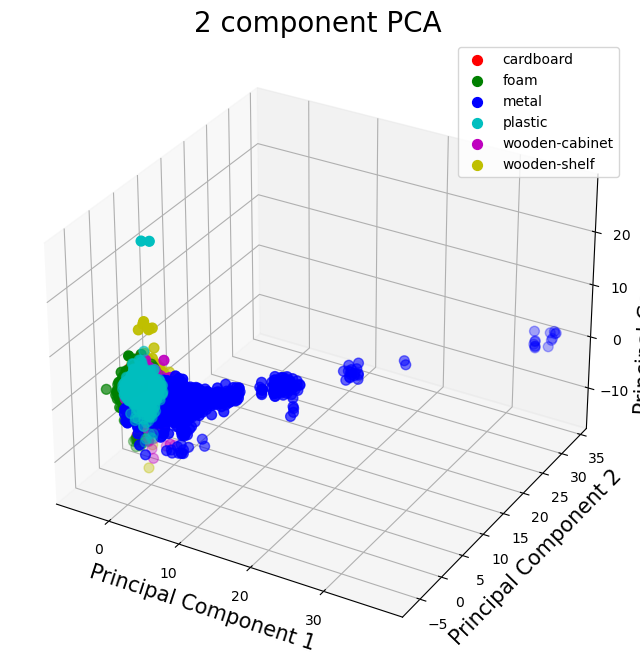

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet', 'wooden-shelf']
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['material'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

In [14]:
targets = ['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet', 'wooden-shelf']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']

# Create traces
data = []
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['material'] == target
    trace = go.Scatter3d(
        x=finalDf.loc[indicesToKeep, 'principal component 1'],
        y=finalDf.loc[indicesToKeep, 'principal component 2'],
        z=finalDf.loc[indicesToKeep, 'principal component 3'],
        mode='markers',
        marker=dict(
            size=5,
            line=dict(
                color=color,
                width=0.5
            ),
            opacity=0.8
        ),
        name=target
    )
    data.append(trace)

# Layout
layout = go.Layout(
    title='t-SNE',
    scene=dict(
        xaxis_title='principal component 1',
        yaxis_title='principal component 2',
        zaxis_title='principal component 3'
    )
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the interactive plot
fig.show()

## Variation analysis

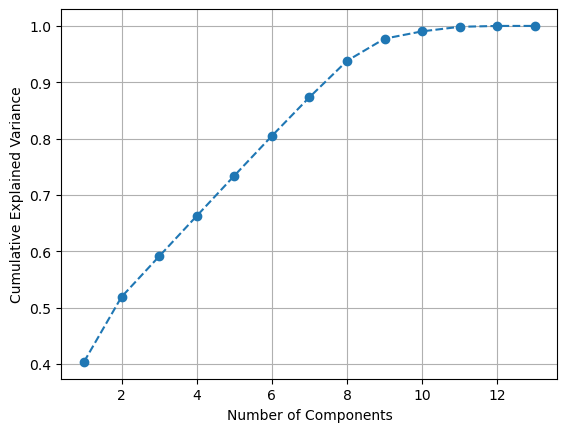

In [15]:
pca = PCA(n_components=13)
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, 14), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()